In [1]:
#Module 4: Model Development

#In this section, we will develop several models that will predict the price of the car using 
#the variables or features. 
#This is just an estimate but should give us an objective idea of how much the car should cost.

#Some questions we want to ask in this module
#do I know if the dealer is offering fair value for my trade-in?
#do I know if I put a fair value on my car?
#Data Analytics, we often use Model Development 
#to help us predict future observations from the data we have.

#A Model will help us understand the exact relationship between different variables 
#and how these variables are used to predict the result.

#Setup
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pwd

'C:\\Users\\Jay Chauhan\\Desktop\\usedcars analysis python project cognitive class\\my python files for the project'

In [3]:
#load data and store in dataframe modeldev:
modeldev = pd.read_csv('clean_usedcarsformodeldev.csv')
modeldev.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-l/100,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,16500,11.190476,low,0,1
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,26,16500,12.368421,medium,0,1
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,30,13950,9.791667,low,0,1
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,22,17450,13.055556,low,0,1
4,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110,5500.0,19,25,15250,12.368421,low,0,1


In [4]:
#1. Linear Regression and Multiple Linear Regression

#Linear Regression

#One example of a Data Model that we will be using is
#Simple Linear Regression. 
#Simple Linear Regression is a method to help us understand 
#the relationship between two variables:
#The predictor/independent variable (X)
#The response/dependent variable (that we want to predict)(Y)
#The result of Linear Regression is a linear function that predicts 
#the response (dependent) variable as a function of the predictor (independent) variable.

#𝑌:𝑅𝑒𝑠𝑝𝑜𝑛𝑠𝑒 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒
#𝑋:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠
#Y:Response VariableX:Predictor Variables

#Linear function: 
#𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋
#Yhat=a+bX

#a refers to the intercept of the regression line0, in other words: the value of Y when X is 0
#b refers to the slope of the regression line, 
#in other words: the value with which Y changes when X increases by 1 unit

#Lets load the modules for linear regression
from sklearn.linear_model import LinearRegression

In [5]:
#Create the linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
#How could Highway-mpg help us predict car price?

#For this example, we want to look at how highway-mpg can help us predict car price. Using simple linear regression, 
#we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.
X=modeldev[['highway-mpg']]
Y=modeldev[['price']]

In [7]:
#Fit the linear model using highway-l/100.
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
#We can output a prediction 

Yhat=lm.predict(X)
Yhat[0:5]

array([[16254.26934067],
       [17077.0977727 ],
       [13785.78404458],
       [20368.41150083],
       [17899.92620473]])

In [9]:
#What is the value of the intercept (a)?
lm.intercept_

array([38470.6370055])

In [10]:
#What is the value of the Slope (b)?
lm.coef_

array([[-822.82843203]])

In [11]:
#What is the final estimated linear model we get?

#As we saw above, we should get a final linear model with the structure:

#𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋
#Yhat=a+bX

#Plugging in the actual values we get:

#price = 38470.6370055 - 822.82843203 x highway-mpg

In [12]:
#Create a linear regression object?
lm1=LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
#Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable?

In [14]:
lm1.fit(modeldev[['engine-size']],modeldev[['price']])
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
lm1.intercept_

array([-7962.44097916])

In [16]:
lm1.coef_

array([[166.8621392]])

In [17]:
#Plugging in the actual values we get:

#price = -7962.44097916 + 166.8621392 x engine-size

In [18]:
#Multiple Linear Regression

#What if we want to predict car price using more than one variable?
#If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. 
#Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:

#𝑌:𝑅𝑒𝑠𝑝𝑜𝑛𝑠𝑒 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒
#𝑋
#1
#:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 1
#𝑋
#2
#:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 2
#𝑋
#3
#:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 3
#𝑋
#4
#:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 4

#Y:Response VariableX1:Predictor Variable 1X2:Predictor Variable 2X3:Predictor Variable 3X4:Predictor Variable 4

#𝑎:𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡
#𝑏
#1
#:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 1
#𝑏
#2
#:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 2
#𝑏
#3
#:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 3
#𝑏
#4
#:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 4

#a:interceptb1:coefficients of Variable 1b2:coefficients of Variable 2b3:coefficients of Variable 3b4:coefficients of Variable 4

#The equation is given by

#𝑌ℎ𝑎𝑡=𝑎+b1X1+b2X2+b3X3+b4X4


#From the previous section we know that other good predictors of price could be:
#Horsepower
#Curb-weight
#Engine-size
#Highway-mpg
#Let's develop a model using these variables as the predictor variables.

In [21]:
lm2=LinearRegression()
lm2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
P=modeldev[['horsepower','curb-weight','engine-size','highway-mpg']]

In [23]:
#Fit the linear model using the four above-mentioned variables.
lm2.fit(P,modeldev['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
#What is the value of the intercept(a)?
lm2.intercept_

-15794.35437120974

In [25]:
#What are the values of the coefficients (b1, b2, b3, b4)?
lm2.coef_

array([53.5112049 ,  4.70487452, 81.53080659, 35.87654175])

In [26]:
#What is the final estimated linear model that we get?

#As we saw above, we should get a final linear function with the structure:

#Yhat=a+b1X1+b2X2+b3X3+b4X4
#What is the linear function we get in this example?
#𝑌ℎ𝑎𝑡=𝑎+b1X1+b2X2+b3X3+b4X4
#Price = -15794.35437120974 + 53.5112049 x horsepower + 4.70487452 x curb-weight + 81.53080659 x engine-size 
#+ 35.87654175 x highway-mpg

In [28]:
#Create and train a Multiple Linear Regression model "lm3" where the response variable is price, 
#and the predictor variable is 'normalized-losses' and 'highway-mpg'.
lm3=LinearRegression()
lm3

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
Q=modeldev[['normalized-losses','highway-mpg']]

In [30]:
lm3.fit(Q,modeldev['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
lm3.intercept_

38255.05667129213

In [32]:
lm3.coef_


array([   1.45409594, -821.58496582])

In [33]:
#model will be 38255.05667129213 + 1.45409594 x normalized-losses -821.58496582 x highway-mpg

In [34]:
#2) Model Evaluation using Visualization

#Now that we've developed some models, how do we evaluate our models and how do we choose the best one? 
#One way to do this is by using visualization.

#import the visualization package: seaborn

In [35]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline

In [36]:
#Regression Plot

#When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.
#This plot will show a combination of a scattered data points (a scatter plot), 
#as well as the fitted linear regression line going through the data. 
#This will give us a reasonable estimate of the relationship between the two variables, 
#the strength of the correlation, as well as the direction (positive or negative correlation).

#Let's visualize Highway-mpg as potential predictor variable of price:

(0, 48270.20608190301)

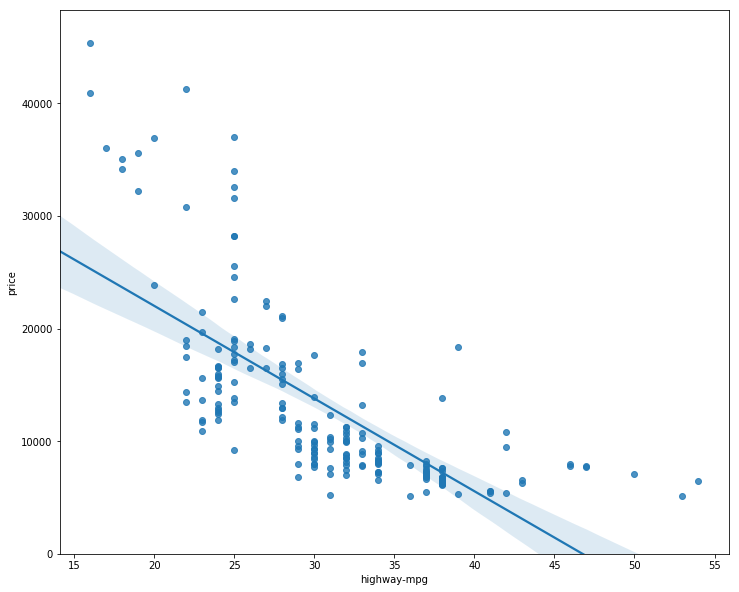

In [38]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x="highway-mpg",y="price",data=modeldev)
plt.ylim(0,)

In [39]:
#We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative. 
#One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points 
#are around the regression line. This will give you a good indication of the variance of the data, 
#and whether a linear model would be the best fit or not. If the data is too far off from the line, 
#this linear model might not be the best model for this data. Let's compare this plot to the regression plot of "peak-rpm".

(0, 47422.91836915011)

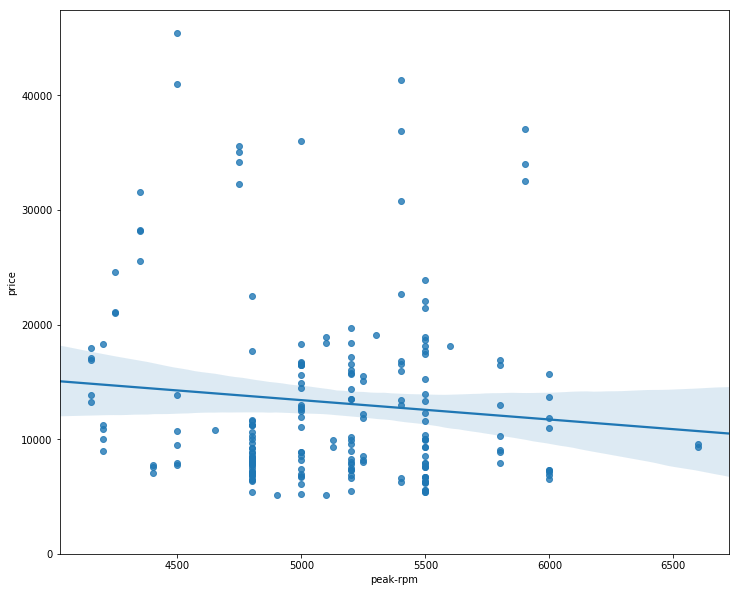

In [40]:
plt.figure(figsize=(width,height))
sns.regplot(x="peak-rpm",y="price",data=modeldev)
#plt.ylim(0,)

In [41]:
#Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that 
#the points for "highway-mpg" are much closer to the generated line and on the average decrease. 
#The points for "peak-rpm" have more spread around the predicted line, 
#and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.

In [46]:
#Given the regression plots above
#is "peak-rpm" or "highway-mpg" more strongly correlated with "price". Use the method ".corr()" to verify your answer.
modeldev[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.059319,-0.101593
highway-mpg,-0.059319,1.000000,-0.705115
price,-0.101593,-0.705115,1.000000


In [47]:
#Residual Plot
#A good way to visualize the variance of the data is to use a residual plot.
#What is a residual?
#The difference between the observed value (y) and the predicted value (Yhat) is 
#called the residual (e). When we look at a regression plot, the residual is the distance from the 
#data point to the fitted regression line.
#So what is a residual plot?
#A residual plot is a graph that shows the residuals on the vertical y-axis 
#and the independent variable on the horizontal x-axis.
#What do we pay attention to when looking at a residual plot?
#We look at the spread of the residuals:
#If the points in a residual plot are randomly spread out around the x-axis, 
#then a linear model is appropriate for the data. Why is that? Randomly spread out 
#residuals means that the variance is constant, and thus the linear model is a good fit for this data.

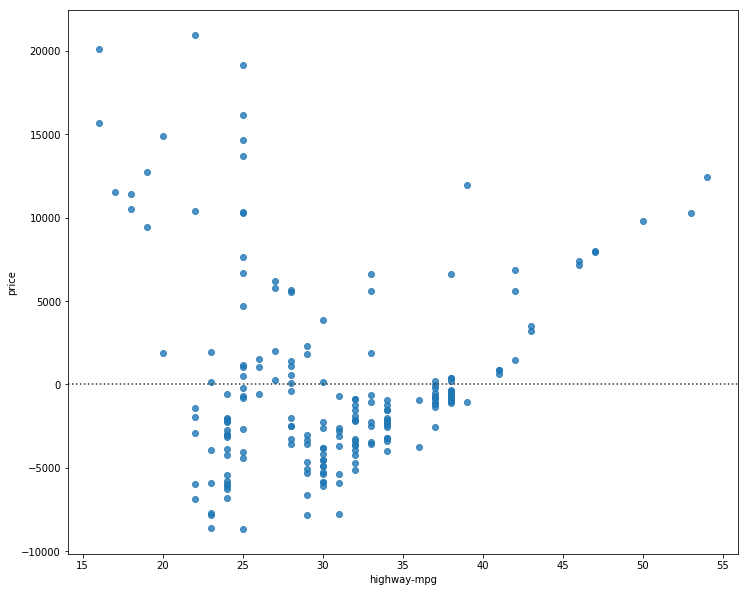

In [53]:
#residual plot for highway-mpg and price
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.residplot(modeldev["highway-mpg"],modeldev["price"])
plt.show()

In [54]:
#What is this plot telling us?
#We can see from this residual plot that the residuals are not randomly spread around the x-axis, 
#which leads us to believe that maybe a non-linear model is more appropriate for this data.

In [55]:
#Multiple Linear Regression

#How do we visualize a model for Multiple Linear Regression? 
#This gets a bit more complicated because you can't visualize it with regression or residual plot.
#One way to look at the fit of the model is by looking at the distribution plot: 
#We can look at the distribution of the fitted values that result from the model and 
#compare it to the distribution of the actual values.

#First lets make a prediction 

In [57]:
Y_hat = lm2.predict(P) #here I use lm2 bcz thats what I used above to deal with P.

C:\Users\Jay Chauhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


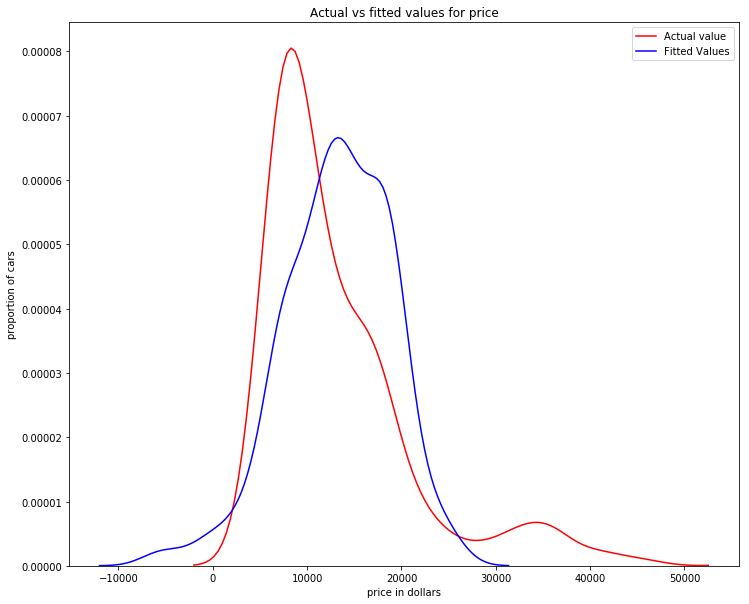

In [59]:
plt.figure(figsize=(width,height))

ax1 = sns.distplot(modeldev['price'], hist=False, color="r", label="Actual value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.title("Actual vs fitted values for price")
plt.xlabel("price in dollars")
plt.ylabel("proportion of cars")

plt.show()
plt.close()

In [60]:
#We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. 
#However, there is definitely some room for improvement.

In [61]:
#Part 3: Polynomial Regression and Pipelines

#Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.
#We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.
#There are different orders of polynomial regression:

#Quadratic - 2nd order
#cubic-3rd order an so on.
#We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

#We will use the following function to plot the data:

In [62]:
def pollyplot(model, independent_variable, dependent_variable, Name):
    x_new=np.linspace(15,55,100)
    y_new=model(x_new)
    
    plt.plot(independent_variable, dependent_variable,'.',x_new,y_new,'-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [63]:
#lets get the variables
x = modeldev['highway-mpg']
y = modeldev['price']

In [64]:
#Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.

In [65]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x,y,3)
p=np.poly1d(f)
print(p)

        3         2
-1.552 x + 204.2 x - 8948 x + 1.378e+05


In [66]:
#Let's plot the function 

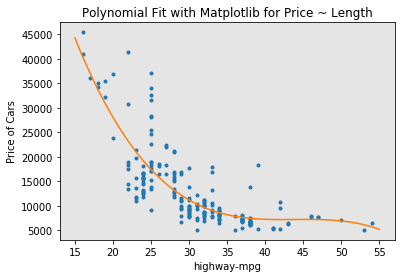

In [67]:
pollyplot(p,x,y,'highway-mpg')

In [69]:
np.polyfit(x,y,3)

array([-1.55173297e+00,  2.04232144e+02, -8.94817574e+03,  1.37751367e+05])

In [70]:
#We can already see from plotting that this polynomial model performs better than the linear model.
#This is because the generated polynomial function "hits" more of the data points.

In [71]:
#Create 11 order polynomial model with the variables x and y from above?

In [73]:
f = np.polyfit(x,y,11)
p=np.poly1d(f)
print(p)

            11             10             9           8         7
-1.273e-08 x  + 4.839e-06 x  - 0.0008229 x + 0.08259 x - 5.432 x
          6        5             4             3            2
 + 245.6 x - 7786 x + 1.729e+05 x - 2.634e+06 x + 2.62e+07 x - 1.532e+08 x + 3.987e+08


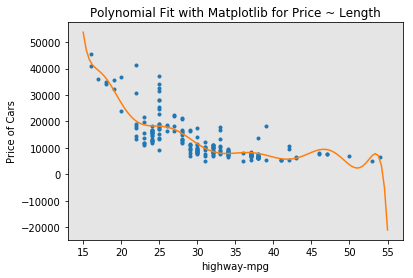

In [74]:
#Let's plot the function 
pollyplot(p,x,y,'highway-mpg')

In [75]:
#The analytical expression for Multivariate Polynomial function gets complicated. 
#For example, the expression for a second-order (degree=2)polynomial with two variables is given by:
#𝑌ℎ𝑎𝑡=𝑎+b1x1+b2x2+b3x1x2+b4x1^2+b5x2^2
#We can perform a polynomial transform on multiple features. First, we import the module:


In [76]:
from sklearn.preprocessing import PolynomialFeatures

In [77]:
#We create a PolynomialFeatures object of degree 2: 
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [78]:
P_pr=pr.fit_transform(P)

In [79]:
#The original data is of 201 samples and 4 features 

In [80]:
P.shape

(200, 4)

In [82]:
#after the transformation, there 201 samples and 15 features

In [83]:
P_pr.shape

(200, 15)

In [84]:
#Pipeline

#Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. 
#We also use StandardScaler as a step in our pipeline.

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [86]:
#We create the pipeline, 
#by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [87]:
Input=[('scale',StandardScaler()), ('Polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [88]:
#we input the list as an argument to the pipeline constructor 

In [89]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('Polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [90]:
#We can normalize the data, perform a transform and fit the model simultaneously. 

In [91]:
pipe.fit(P,y)

C:\Users\Jay Chauhan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jay Chauhan\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('Polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [92]:
#Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously

In [93]:
ypipe=pipe.predict(P)
ypipe[0:4]

C:\Users\Jay Chauhan\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13094.88646565, 18222.75956485, 10386.17943722, 16125.1447952 ])

In [94]:
#Create a pipeline that Standardizes the data, 
#then perform prediction using a linear regression model using the features P and targets y.

In [95]:
Input1=[('Scale',StandardScaler()),('model',LinearRegression())]

In [104]:
pipe1=Pipeline(Input1)
pipe1

Pipeline(memory=None,
     steps=[('Scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [105]:
#print(type(pipe1))

<class 'sklearn.pipeline.Pipeline'>


In [106]:
pipe1.fit(P,y)

C:\Users\Jay Chauhan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jay Chauhan\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('Scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [107]:
ypipe1=pipe1.predict(P)
ypipe1[0:10]

C:\Users\Jay Chauhan\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13701.08113673, 19053.70464401, 10622.23445554, 15523.47345497,
       13872.10183248, 15457.64454615, 15975.18074348, 17614.52358563,
       10724.19862453, 10724.19862453])

In [108]:
#Part 4: Measures for In-Sample Evaluation

#When evaluating our models, not only do we want to visualize the results,
#but we also want a quantitative measure to determine how accurate the model is.
#Two very important measures that are often used in Statistics to determine the accuracy of a model are:
#R^2 / R-squared
#Mean Squared Error (MSE)
#R-squared
#R squared, also known as the coefficient of determination, is a measure 
#to indicate how close the data is to the fitted regression line.
#The value of the R-squared is the percentage of variation of the response variable (y) 
#that is explained by a linear model.
#Mean Squared Error (MSE)
#The Mean Squared Error measures the average of the squares of errors, that is, 
#the difference between actual value (y) and the estimated value (ŷ).

In [109]:
#Model 1: Simple Linear Regression

#Let's calculate the R^2

#highway_mpg_fit
lm.fit(X,Y)
# Find the R^2
print('The R-Square is:', lm.score(X,Y))

The R-Square is: 0.49718675257265266


In [110]:
#We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

In [111]:
#Let's calculate the MSE

#We can predict the output i.e., "yhat" using the predict method, where X is the input variable:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[16254.26934067]
 [17077.0977727 ]
 [13785.78404458]
 [20368.41150083]]


In [112]:
#lets import the function mean_squared_error from the module metrics

In [113]:
from sklearn.metrics import mean_squared_error

In [114]:
#we compare the predicted results with the actual results 

In [115]:
mse = mean_squared_error(modeldev['price'],Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31755395.41081296


In [116]:
#Model 2: Multiple Linear Regression

#Let's calculate the R^2

In [117]:
# fit the model 
lm.fit(P, modeldev['price'])
# Find the R^2
print('The R-square is: ', lm.score(P, modeldev['price']))

The R-square is:  0.8093753249041753


In [118]:
#We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

In [119]:
#Let's calculate the MSE

#we produce a prediction 

In [122]:
Y_predict_multifit = lm.predict(P)

In [123]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(modeldev['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  12038986.569462512


In [124]:
#Model 3: Polynomial Fit

#Let's calculate the R^2

#let’s import the function r2_score from the module metrics as we are using a different function

In [125]:
from sklearn.metrics import r2_score

In [126]:
#We apply the function to get the value of r^2

In [127]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.7032923278386085


In [128]:
#We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit

In [129]:
#MSE

##We can also calculate the MSE: 

In [130]:
mean_squared_error(modeldev['price'], p(x))

18738705.67077345

In [131]:
#Part 5: Prediction and Decision Making
#Prediction
#In the previous section, we trained the model using the method fit.
#Now we will use the method predict to produce a prediction. 
#Lets import pyplot for plotting; we will also be using some functions from numpy.

In [132]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [133]:
#Create a new input 

In [146]:
new_input=np.arange(1,100,1).reshape(-1,1)
#new_input

In [147]:
#Fit the model 

In [148]:
lm.fit(X,Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [149]:
#Produce a prediction

In [152]:
yhat=lm.predict(new_input)
yhat[0:5]

array([[37647.80857347],
       [36824.98014144],
       [36002.15170941],
       [35179.32327737],
       [34356.49484534]])

In [153]:
#we can plot the data 

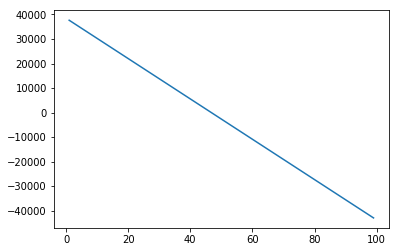

In [155]:
plt.plot(new_input,yhat)
plt.show()

In [ ]:
#Decision Making: Determining a Good Model Fit

#Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, 
#how do we determine a good model fit? 
#What is a good R-squared value?

#When comparing models, the model with the higher R-squared value is a better fit for the data. 
#What is a good MSE?

#When comparing models, the model with the smallest MSE value is a better fit for the data.
#Let's take a look at the values for the different models.
#Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price. 
#R-squared: 0.49659118843391759
#MSE: 3.16 x10^7

#Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price. 
#R-squared: 0.80896354913783497
#MSE: 1.2 x10^7

#Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price. 
#R-squared: 0.6741946663906514
#MSE: 2.05 x 10^7


#Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)

#Usually, the more variables you have, the better your model is at predicting, 
#but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, 
#or many of the variables may not be useful and or even act as noise. As a result, you should always check the MSE and R^2.
#So to be able to compare the results of the MLR vs SLR models, 
#we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model. 
#MSEThe MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
#R-squared: In this case, we can also see that there is a big difference between the R-squared of the 
#    SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is 
 #   very small compared to the R-squared for the MLR (~0.809).

#This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.

#Simple Linear Model (SLR) vs Polynomial Fit

#MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
#R-squared: The R-squared for the Polyfit is larger than the R-squared 
 #   for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
#Since the Polynomial Fit resulted in a lower MSE 
#and a higher R-squared, we can conclude that this was a better 
#fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.

#Multiple Linear Regression (MLR) vs Polynomial Fit

#MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
#R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.

#Conclusion:

#Comparing these three models, we conclude that the MLR model is 
#the best model to be able to predict price from our dataset. This result makes sense, since we have 
#27 variables in total, 
#and we know that more than one of those variables are potential predictors of the final car price.